# ARIMA

### Libraries

In [1]:
# import libraries

import joblib

import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings('ignore')

### Data

In [2]:
# load negative, neutral and positive time series

negative_reviews_per_month = pd.read_csv('features/negative_reviews_per_month.csv', index_col=0, parse_dates=True)
neutral_reviews_per_month = pd.read_csv('features/neutral_reviews_per_month.csv', index_col=0, parse_dates=True)
positive_reviews_per_month = pd.read_csv('features/positive_reviews_per_month.csv', index_col=0, parse_dates=True)

In [3]:
# load sentiment time series

sentiment_per_month = pd.read_csv('features/sentiment_per_month.csv', index_col=0, parse_dates=True)

In [4]:
# load categories time series

sentiment_restaurants_per_month = pd.read_csv('features/sentiment_restaurants_per_month.csv', index_col=0, parse_dates=True)
sentiment_nightlife_per_month = pd.read_csv('features/sentiment_nightlife_per_month.csv', index_col=0, parse_dates=True)
sentiment_breakfast_brunch_per_month = pd.read_csv('features/sentiment_breakfast_brunch_per_month.csv', index_col=0, parse_dates=True)

### Stationarity

In [5]:
def stationarity_adf(time_series, extra_info=False):
    '''
    Check stationarity with Augmented Dickey-Fuller test
    '''
    adf_test = adfuller(time_series, autolag='AIC', regression='ct')
    print("ADF Test Results")
    print(f"p-value: {adf_test[1]}")
    if extra_info:
        print("Null Hypothesis: The series has a unit root (non-stationary)")
        print(f"ADF Statistic: {adf_test[0]}")
        print(f"Used Lags: {adf_test[2]}")
        print(f"Number of Observations: {adf_test[3]}")
        print(f"Critical Values: {adf_test[4]}")
        print("Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary")
    is_stationary = adf_test[1] < 0.05
    print(f"Is the series stationary? {is_stationary}")
    print()

#### Negative reviews

ADF Test Results
p-value: 1.2857483863914148e-05
Is the series stationary? True



<Axes: title={'center': 'Differenced Negative Reviews (Box-Cox)'}, xlabel='date'>

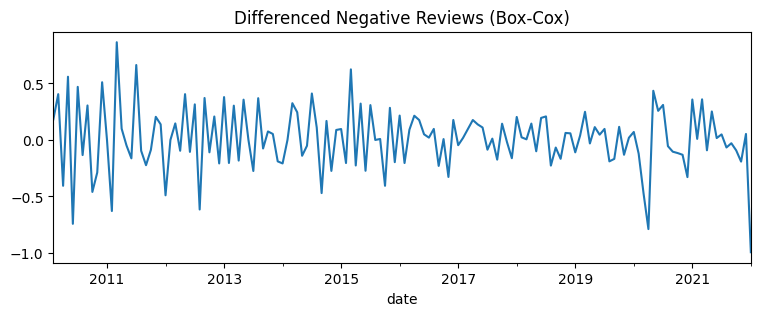

In [6]:
# differencing negative reviews to make it stationary

negative_box_cox = negative_reviews_per_month['box_cox'].dropna()
negative_box_cox_diff = negative_box_cox.diff().dropna()

stationarity_adf(negative_box_cox_diff)

negative_box_cox_diff.plot(figsize=(9, 3), title='Differenced Negative Reviews (Box-Cox)')

#### Neutral reviews

ADF Test Results
p-value: 0.014866707503239974
Is the series stationary? True



<Axes: title={'center': 'Differenced Neutral Reviews (Box-Cox)'}, xlabel='date'>

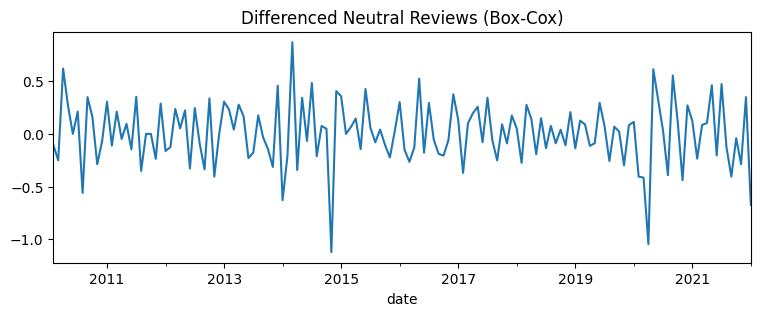

In [7]:
# differencing neutral reviews to make it stationary

neutral_box_cox = neutral_reviews_per_month['box_cox'].dropna()
neutral_box_cox_diff = neutral_box_cox.diff().dropna()

stationarity_adf(neutral_box_cox_diff)

neutral_box_cox_diff.plot(figsize=(9, 3), title='Differenced Neutral Reviews (Box-Cox)')

#### Positive reviews

ADF Test Results
p-value: 5.9547913142626986e-06
Is the series stationary? True



<Axes: title={'center': 'Differenced Positive Reviews (Box-Cox)'}, xlabel='date'>

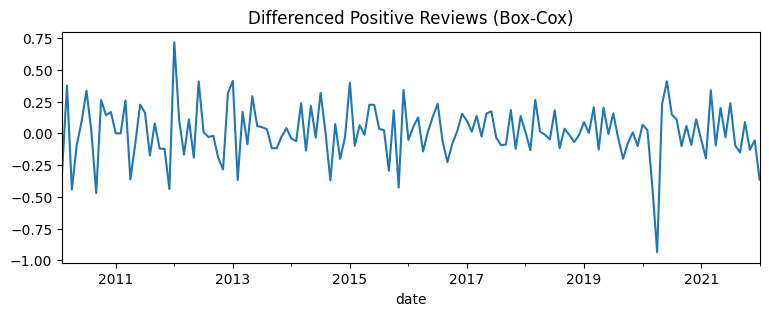

In [8]:
# differencing positive reviews to make it stationary

positive_box_cox = positive_reviews_per_month['box_cox'].dropna()
positive_box_cox_diff = positive_box_cox.diff().dropna()

stationarity_adf(positive_box_cox_diff)

positive_box_cox_diff.plot(figsize=(9, 3), title='Differenced Positive Reviews (Box-Cox)')

#### Sentiment

ADF Test Results
p-value: 6.715004872955231e-08
Is the series stationary? True



<Axes: title={'center': 'Differenced Sentiment (Box-Cox)'}, xlabel='date'>

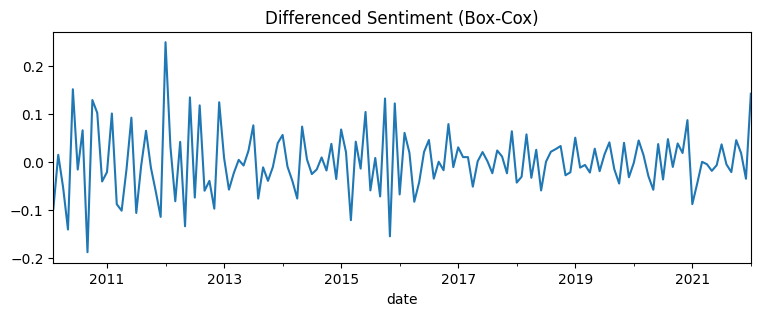

In [9]:
# differencing sentiment to make it stationary

sentiment_box_cox = sentiment_per_month['box_cox'].dropna()
sentiment_box_cox_diff = sentiment_box_cox.diff().dropna()

stationarity_adf(sentiment_box_cox_diff)

sentiment_box_cox_diff.plot(figsize=(9, 3), title='Differenced Sentiment (Box-Cox)')

#### Category sentiment

ADF Test Results
p-value: 3.3864427487365843e-07
Is the series stationary? True



<Axes: title={'center': 'Differenced Restaurant Sentiment (Box-Cox)'}, xlabel='date'>

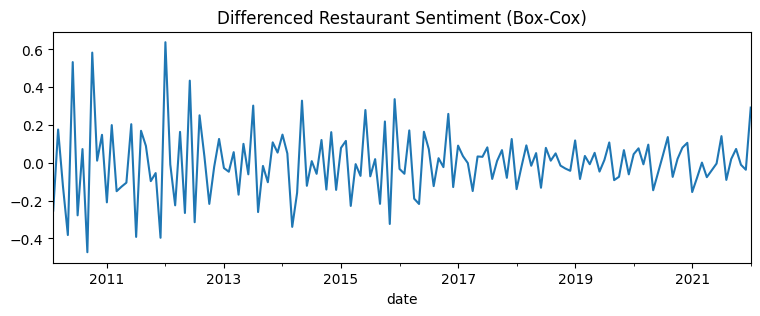

In [10]:
# differencing restaurant sentiment to make it stationary

restaurant_box_cox = sentiment_restaurants_per_month['box_cox'].dropna()
restaurant_box_cox_diff = restaurant_box_cox.diff().dropna()

stationarity_adf(restaurant_box_cox_diff)

restaurant_box_cox_diff.plot(figsize=(9, 3), title='Differenced Restaurant Sentiment (Box-Cox)')

ADF Test Results
p-value: 0.00029594815002169855
Is the series stationary? True



<Axes: title={'center': 'Differenced Nightlife Sentiment (Box-Cox)'}, xlabel='date'>

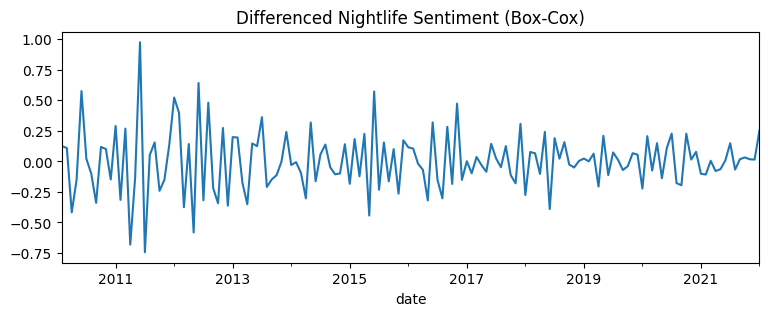

In [11]:
# differencing nightlife sentiment to make it stationary

nightlife_box_cox = sentiment_nightlife_per_month['box_cox'].dropna()
nightlife_box_cox_diff = nightlife_box_cox.diff().dropna()

stationarity_adf(nightlife_box_cox_diff)

nightlife_box_cox_diff.plot(figsize=(9, 3), title='Differenced Nightlife Sentiment (Box-Cox)')

ADF Test Results
p-value: 3.333103216378896e-06
Is the series stationary? True



<Axes: title={'center': 'Differenced Breakfast & Brunch Sentiment (Box-Cox)'}, xlabel='date'>

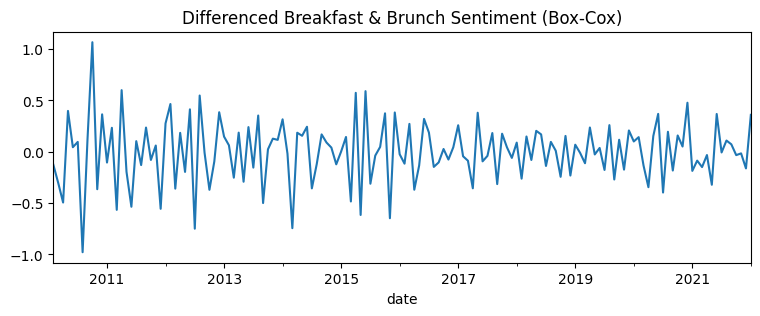

In [12]:
# differencing breakfast & brunch sentiment to make it stationary

breakfast_brunch_box_cox = sentiment_breakfast_brunch_per_month['box_cox'].dropna()
breakfast_brunch_box_cox_diff = breakfast_brunch_box_cox.diff().dropna()

stationarity_adf(breakfast_brunch_box_cox_diff)

breakfast_brunch_box_cox_diff.plot(figsize=(9, 3), title='Differenced Breakfast & Brunch Sentiment (Box-Cox)')

### Autocorrelation and partial autocorrelation

In [13]:
def acf_and_pacf_plots(time_series, title='ACF and PACF Plots'):
    '''
    Plot ACF and PACF plots for time series data
    '''
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

    plot_acf(time_series, ax=axes[0], lags=40)
    plot_pacf(time_series, ax=axes[1], lags=40)

    axes[0].set_title('ACF')
    axes[1].set_title('PACF')

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

#### Negative, neutral and positive reviews

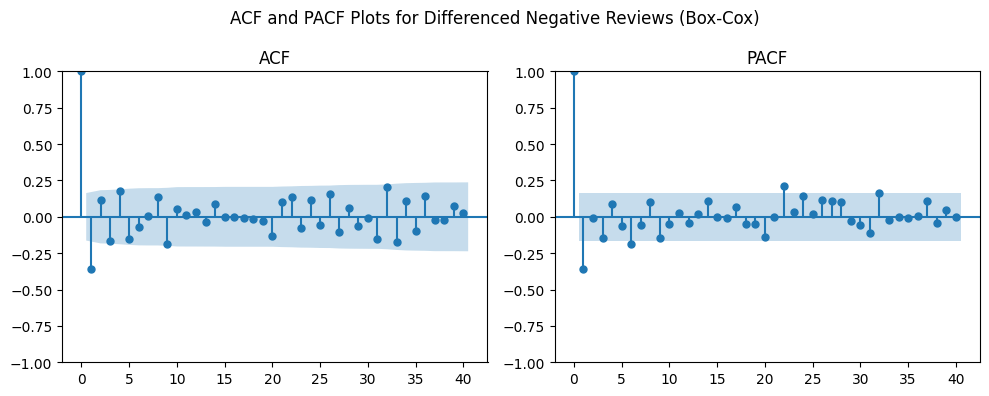

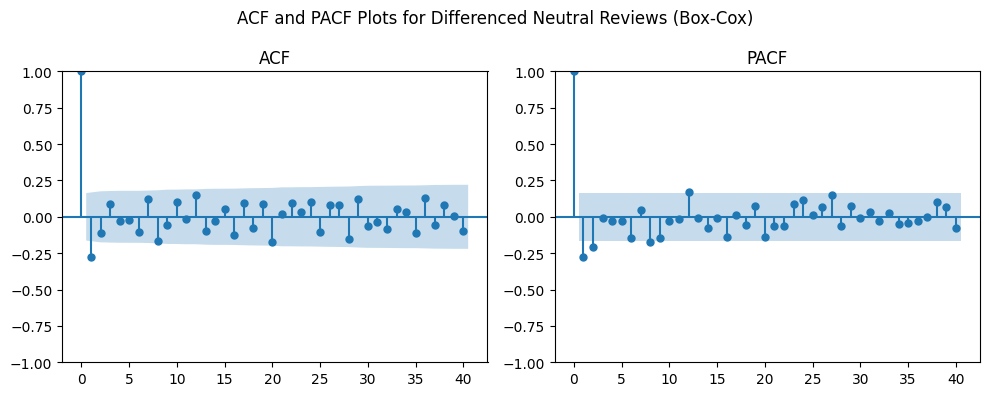

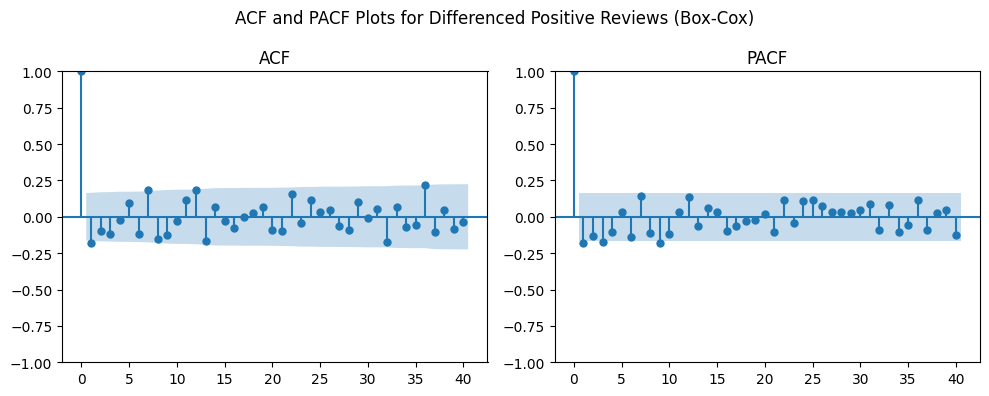

In [14]:
# ACF and PACF plots for negative, neutral and positive reviews

acf_and_pacf_plots(negative_box_cox_diff, title='ACF and PACF Plots for Differenced Negative Reviews (Box-Cox)')
acf_and_pacf_plots(neutral_box_cox_diff, title='ACF and PACF Plots for Differenced Neutral Reviews (Box-Cox)')
acf_and_pacf_plots(positive_box_cox_diff, title='ACF and PACF Plots for Differenced Positive Reviews (Box-Cox)')

#### Sentiment

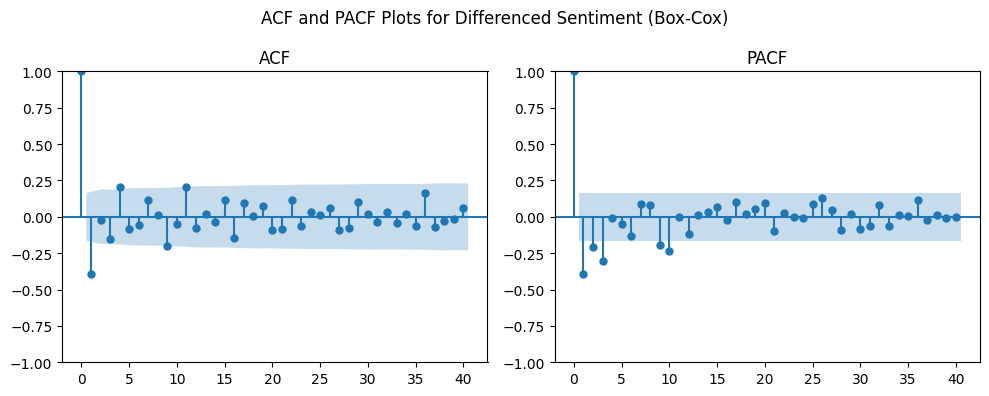

In [15]:
# ACF and PACF plots for sentiment per month

acf_and_pacf_plots(sentiment_box_cox_diff, title='ACF and PACF Plots for Differenced Sentiment (Box-Cox)')

#### Category sentiment

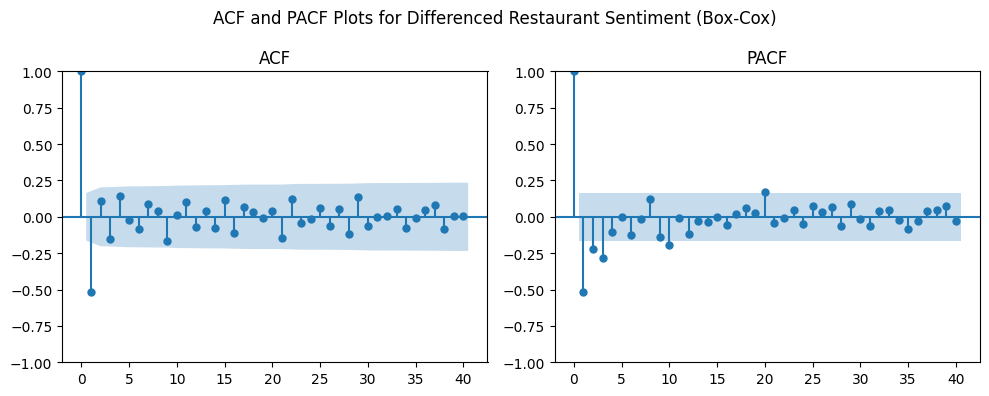

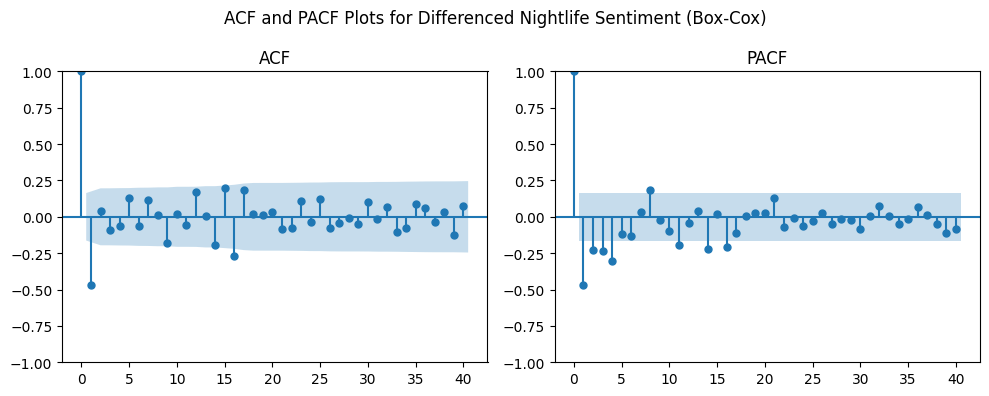

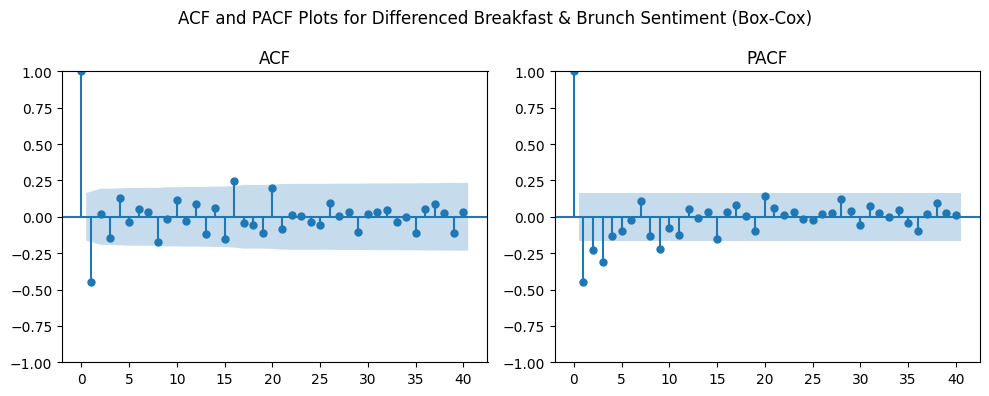

In [16]:
# ACF and PACF plots for categories sentiment per month

acf_and_pacf_plots(restaurant_box_cox_diff, title='ACF and PACF Plots for Differenced Restaurant Sentiment (Box-Cox)')
acf_and_pacf_plots(nightlife_box_cox_diff, title='ACF and PACF Plots for Differenced Nightlife Sentiment (Box-Cox)')
acf_and_pacf_plots(breakfast_brunch_box_cox_diff, title='ACF and PACF Plots for Differenced Breakfast & Brunch Sentiment (Box-Cox)')

### ARIMA modelling

In [17]:
# order values

p_values = range(0, 5)
d_values = range(1, 3)
q_values = range(0, 5)

In [18]:
def fit_arima_model(time_series, p_values=p_values, d_values=d_values, q_values=q_values):
    '''
    Fit ARIMA model to time series data using AICc
    '''
    best_aic = float("inf")
    best_order = None
    best_model = None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    model = ARIMA(time_series, order=(p, d, q))
                    model_fit = model.fit()
                    aic = model_fit.aic
                    print(f'ARIMA({p},{d},{q}) - AIC:{aic}')
                    if aic < best_aic:
                        best_aic = aic
                        best_order = (p, d, q)
                        best_model = model_fit
                except Exception as e:
                    print(f'Error fitting ARIMA({p},{d},{q}): {e}')
                    continue
    print(f'Best ARIMA model order: {best_order} with AIC: {best_aic}')
    return best_model

#### Sentiment

ARIMA(0,1,0) - AIC:-377.31348977802554
ARIMA(0,1,1) - AIC:-428.75138316093967
ARIMA(0,1,2) - AIC:-429.2937671909448
ARIMA(0,1,3) - AIC:-427.7435948078694
ARIMA(0,1,4) - AIC:-428.75309057922055
ARIMA(0,2,0) - AIC:-229.32896286517402
ARIMA(0,2,1) - AIC:-366.71237381619903
ARIMA(0,2,2) - AIC:-417.6986973337606
ARIMA(0,2,3) - AIC:-419.83943140613144
ARIMA(0,2,4) - AIC:-418.8877693466926
ARIMA(1,1,0) - AIC:-401.1428709900847
ARIMA(1,1,1) - AIC:-429.47633874982944
ARIMA(1,1,2) - AIC:-424.9264778057768
ARIMA(1,1,3) - AIC:-427.7773603664577
ARIMA(1,1,4) - AIC:-427.57233533715214
ARIMA(1,2,0) - AIC:-300.13368265558216
ARIMA(1,2,1) - AIC:-389.66526791776255
ARIMA(1,2,2) - AIC:-420.37325681667977
ARIMA(1,2,3) - AIC:-413.78714897885556
ARIMA(1,2,4) - AIC:-415.8683704808776
ARIMA(2,1,0) - AIC:-406.22946921500227
ARIMA(2,1,1) - AIC:-427.47878425939393
ARIMA(2,1,2) - AIC:-426.43799893487983
ARIMA(2,1,3) - AIC:-428.4771187177946
ARIMA(2,1,4) - AIC:-437.31312466182175
ARIMA(2,2,0) - AIC:-318.5915324254

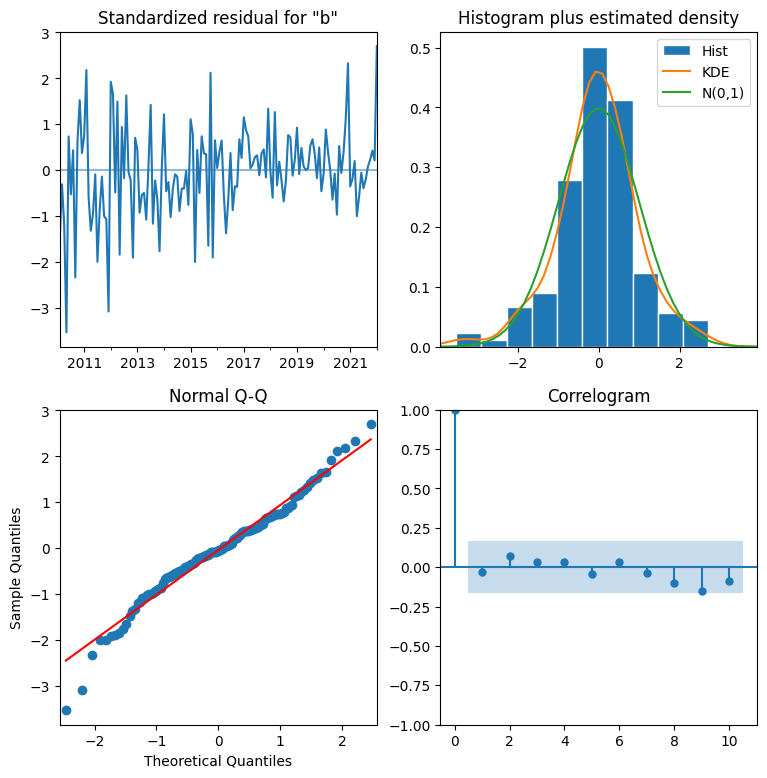

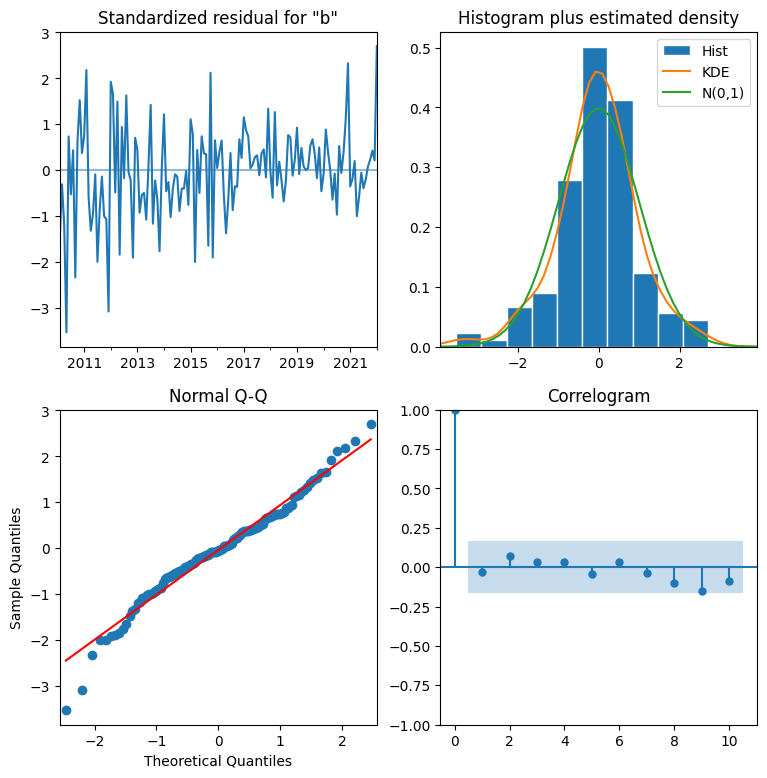

In [19]:
# fit box-cox model and check diagnostics

sentiment_box_cox_arima = fit_arima_model(sentiment_per_month['box_cox'])
sentiment_box_cox_arima.plot_diagnostics(figsize=(9, 9))

ARIMA(0,1,0) - AIC:-245.6370585230097
ARIMA(0,1,1) - AIC:-302.67305446641086
ARIMA(0,1,2) - AIC:-302.4642247828107
ARIMA(0,1,3) - AIC:-300.69585990664024
ARIMA(0,1,4) - AIC:-302.3272791347258
ARIMA(0,2,0) - AIC:-96.06143385071768
ARIMA(0,2,1) - AIC:-235.95094020187796
ARIMA(0,2,2) - AIC:-291.89771923372086
ARIMA(0,2,3) - AIC:-292.85485232646835
ARIMA(0,2,4) - AIC:-291.54033811629756
ARIMA(1,1,0) - AIC:-271.3832614170206
ARIMA(1,1,1) - AIC:-302.5356446639364
ARIMA(1,1,2) - AIC:-300.53697948508204
ARIMA(1,1,3) - AIC:-300.56547527608996
ARIMA(1,1,4) - AIC:-300.9264828481316
ARIMA(1,2,0) - AIC:-169.45689734687056
ARIMA(1,2,1) - AIC:-260.80303927495777
ARIMA(1,2,2) - AIC:-293.1441266023486
ARIMA(1,2,3) - AIC:-288.0810066329547
ARIMA(1,2,4) - AIC:-288.85525117081943
ARIMA(2,1,0) - AIC:-276.7438386141013
ARIMA(2,1,1) - AIC:-300.5395464587105
ARIMA(2,1,2) - AIC:-299.374682364255
ARIMA(2,1,3) - AIC:-312.4428389737642
ARIMA(2,1,4) - AIC:-310.5671368081099
ARIMA(2,2,0) - AIC:-187.50418774540353
A

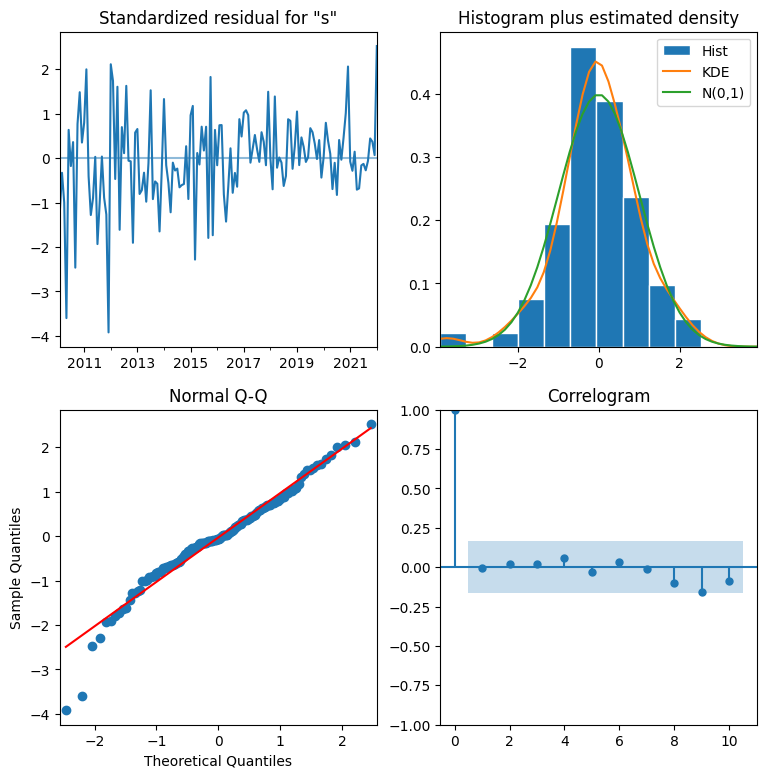

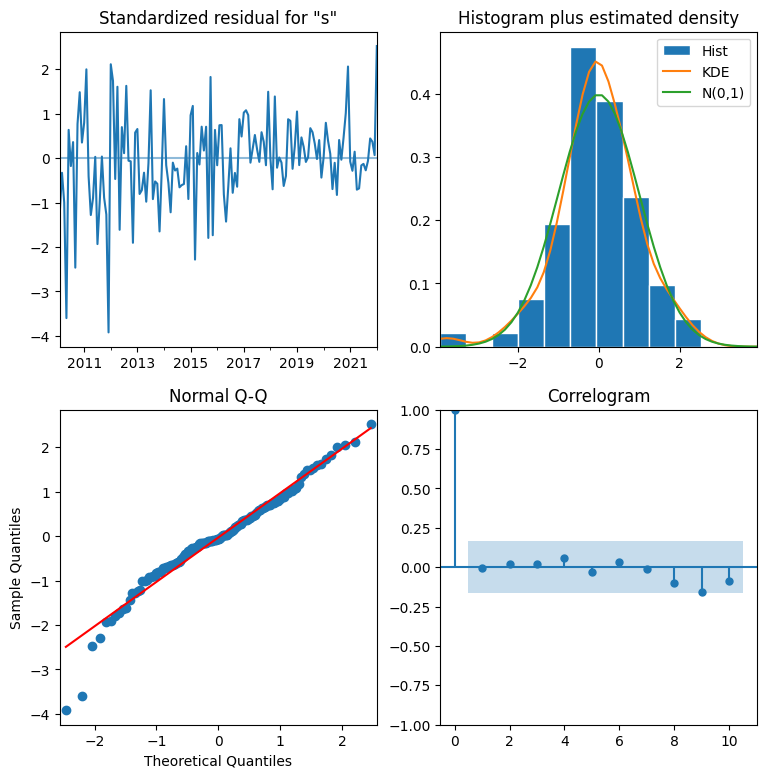

In [20]:
# fit model and check diagnostics

sentiment_arima = fit_arima_model(sentiment_per_month['sentiment'])
sentiment_arima.plot_diagnostics(figsize=(9, 9))

In [21]:
# save models

joblib.dump(sentiment_box_cox_arima, 'models/sentiment_box_cox_arima.pkl')
joblib.dump(sentiment_arima, 'models/sentiment_arima.pkl')

['models/sentiment_arima.pkl']

#### Restaurant sentiment

ARIMA(0,1,0) - AIC:-88.98638823810741
ARIMA(0,1,1) - AIC:-164.2587756275609
ARIMA(0,1,2) - AIC:-162.25888583166275
ARIMA(0,1,3) - AIC:-161.21721782135154
ARIMA(0,1,4) - AIC:-160.31212672474896
ARIMA(0,2,0) - AIC:69.87248298418501
ARIMA(0,2,1) - AIC:-80.38808494524096
ARIMA(0,2,2) - AIC:-152.88900576962857
ARIMA(0,2,3) - AIC:-151.01494040399245
ARIMA(0,2,4) - AIC:-150.73586284353667
ARIMA(1,1,0) - AIC:-133.4675481699645
ARIMA(1,1,1) - AIC:-162.2589088326817
ARIMA(1,1,2) - AIC:-160.97867462983385
ARIMA(1,1,3) - AIC:-160.4478211879249
ARIMA(1,1,4) - AIC:-159.17838790666968
ARIMA(1,2,0) - AIC:-26.055224762938945
ARIMA(1,2,1) - AIC:-123.69845595004713
ARIMA(1,2,2) - AIC:-151.0521918597623
ARIMA(1,2,3) - AIC:-149.35753943099022
ARIMA(1,2,4) - AIC:-147.3665094333105
ARIMA(2,1,0) - AIC:-139.37008062177057
ARIMA(2,1,1) - AIC:-161.35802805917058
ARIMA(2,1,2) - AIC:-160.1820537987321
ARIMA(2,1,3) - AIC:-171.3615707135116
ARIMA(2,1,4) - AIC:-169.24113651704653
ARIMA(2,2,0) - AIC:-50.25756862091504

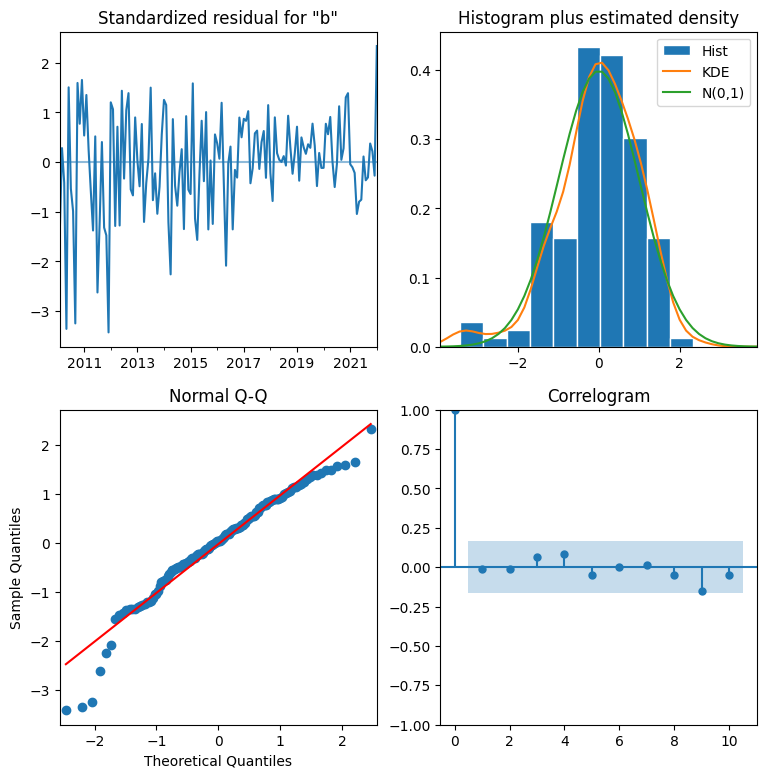

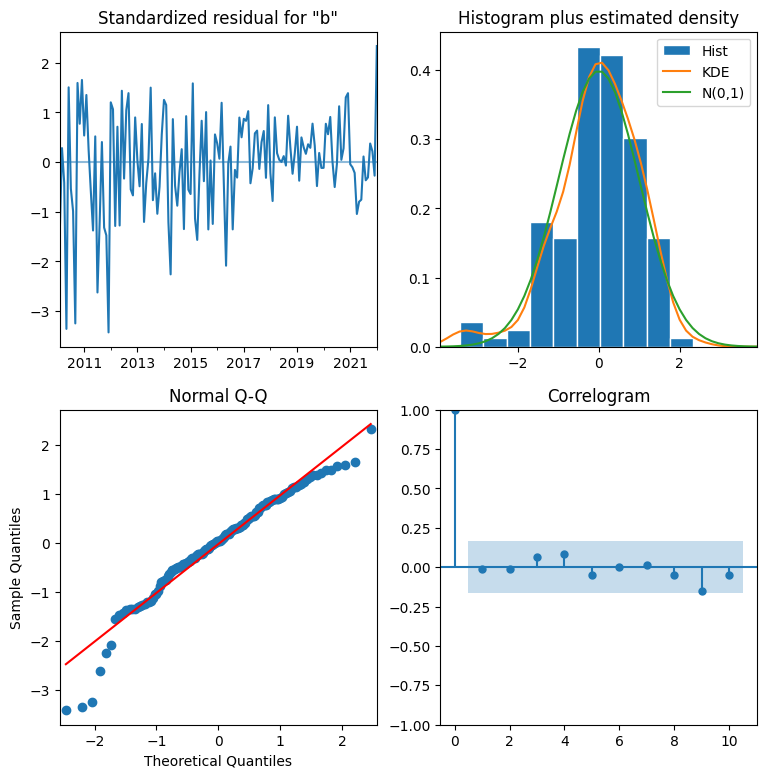

In [22]:
# fit box-cox model and check diagnostics

restaurant_box_cox_arima = fit_arima_model(sentiment_restaurants_per_month['box_cox'])
restaurant_box_cox_arima.plot_diagnostics(figsize=(9, 9))

ARIMA(0,1,0) - AIC:-218.0086918619372
ARIMA(0,1,1) - AIC:-293.88833001016246
ARIMA(0,1,2) - AIC:-291.88844562744777
ARIMA(0,1,3) - AIC:-290.7685454254281
ARIMA(0,1,4) - AIC:-289.9288903772984
ARIMA(0,2,0) - AIC:-58.09714672503583
ARIMA(0,2,1) - AIC:-208.51446607691872
ARIMA(0,2,2) - AIC:-281.5432199320625
ARIMA(0,2,3) - AIC:-279.6443396247096
ARIMA(0,2,4) - AIC:-279.237513310922
ARIMA(1,1,0) - AIC:-262.49484027811747
ARIMA(1,1,1) - AIC:-291.8884695994897
ARIMA(1,1,2) - AIC:-290.5966623902834
ARIMA(1,1,3) - AIC:-289.9822598810727
ARIMA(1,1,4) - AIC:-288.7804469547494
ARIMA(1,2,0) - AIC:-153.91563330138365
ARIMA(1,2,1) - AIC:-251.83045018692792
ARIMA(1,2,2) - AIC:-279.6730449585867
ARIMA(1,2,3) - AIC:-278.02807286444533
ARIMA(1,2,4) - AIC:-275.72551787864666
ARIMA(2,1,0) - AIC:-268.52541868643647
ARIMA(2,1,1) - AIC:-281.6895619401537
ARIMA(2,1,2) - AIC:-289.71801378123394
ARIMA(2,1,3) - AIC:-301.3286560184433
ARIMA(2,1,4) - AIC:-299.0871342301565
ARIMA(2,2,0) - AIC:-178.1531698320612
ARI

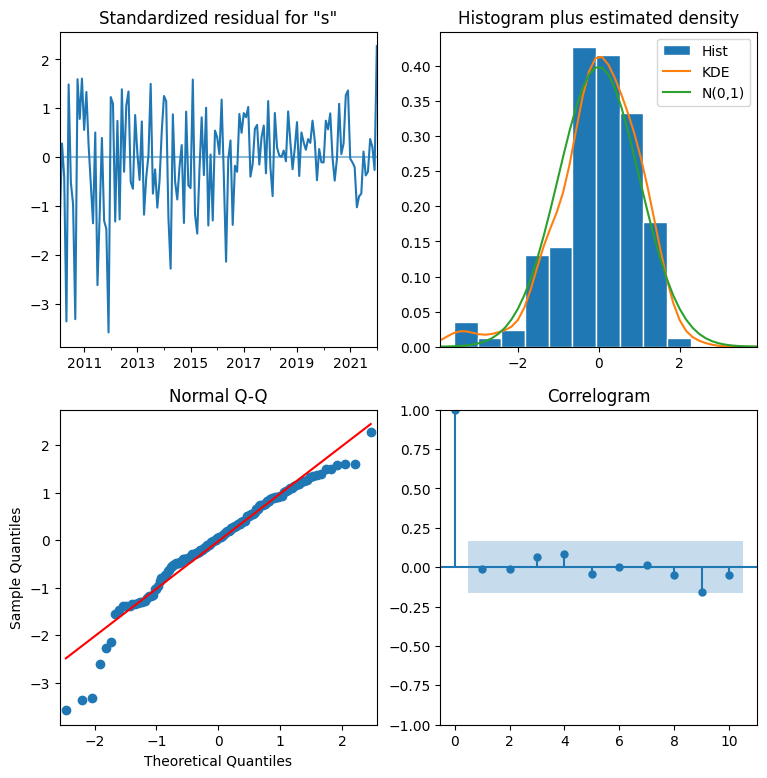

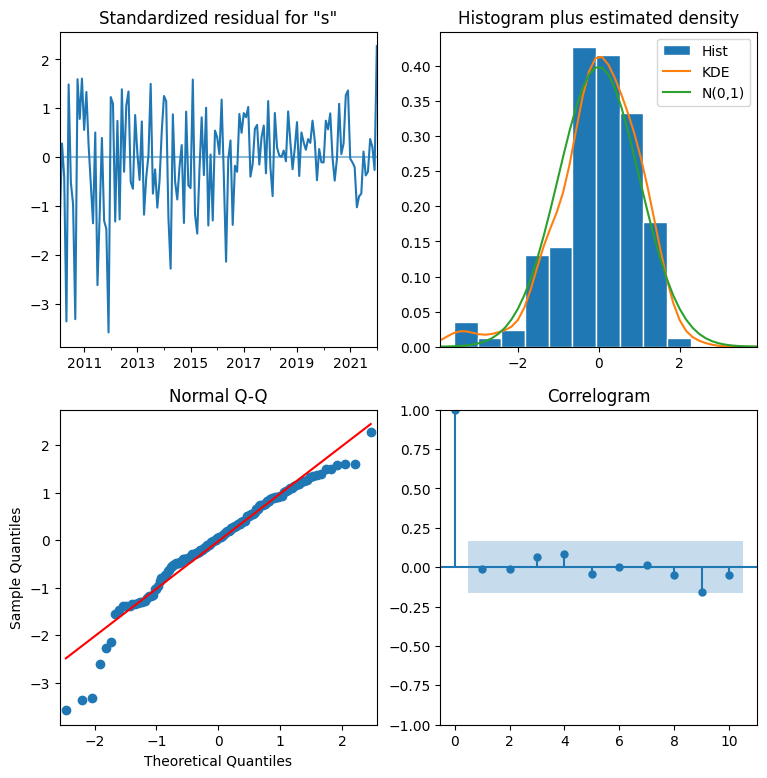

In [23]:
# fit model and check diagnostics

restaurant_arima = fit_arima_model(sentiment_restaurants_per_month['sentiment'])
restaurant_arima.plot_diagnostics(figsize=(9, 9))

In [24]:
# save models

joblib.dump(restaurant_box_cox_arima, 'models/restaurant_box_cox_arima.pkl')
joblib.dump(restaurant_arima, 'models/restaurant_arima.pkl')

['models/restaurant_arima.pkl']

#### Nightlife sentiment

ARIMA(0,1,0) - AIC:6.381097161786428
ARIMA(0,1,1) - AIC:-58.32539707112841
ARIMA(0,1,2) - AIC:-57.801451766675996
ARIMA(0,1,3) - AIC:-57.59092126294979
ARIMA(0,1,4) - AIC:-55.78980293643218
ARIMA(0,2,0) - AIC:160.84664502161974
ARIMA(0,2,1) - AIC:14.307367873582066
ARIMA(0,2,2) - AIC:-46.279906627724266
ARIMA(0,2,3) - AIC:-45.15419355277318
ARIMA(0,2,4) - AIC:-45.4447412872957
ARIMA(1,1,0) - AIC:-27.22505192824383
ARIMA(1,1,1) - AIC:-58.20796615270409
ARIMA(1,1,2) - AIC:-57.67019727400452
ARIMA(1,1,3) - AIC:-55.70451046755899
ARIMA(1,1,4) - AIC:-53.79410299830295
ARIMA(1,2,0) - AIC:77.03947834601745
ARIMA(1,2,1) - AIC:-18.289115985704335
ARIMA(1,2,2) - AIC:-45.600257286098554
ARIMA(1,2,3) - AIC:-42.68765631548973
ARIMA(1,2,4) - AIC:-44.031106958677114
ARIMA(2,1,0) - AIC:-33.218701038251034
ARIMA(2,1,1) - AIC:-57.23609908931523
ARIMA(2,1,2) - AIC:-55.3581256769546
ARIMA(2,1,3) - AIC:-56.165429409935825
ARIMA(2,1,4) - AIC:-58.303296840895996
ARIMA(2,2,0) - AIC:49.81737188341162
ARIMA(2,2

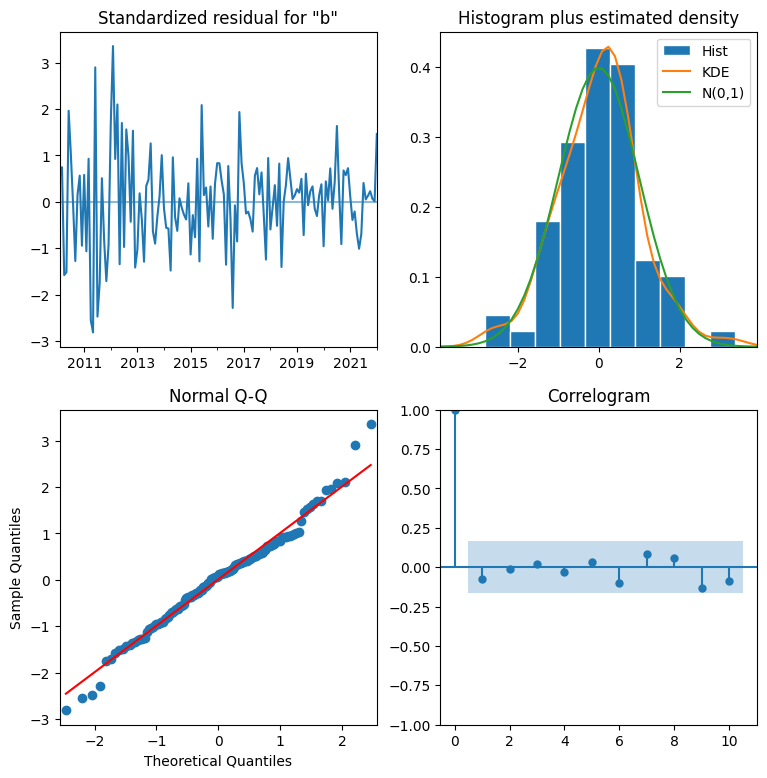

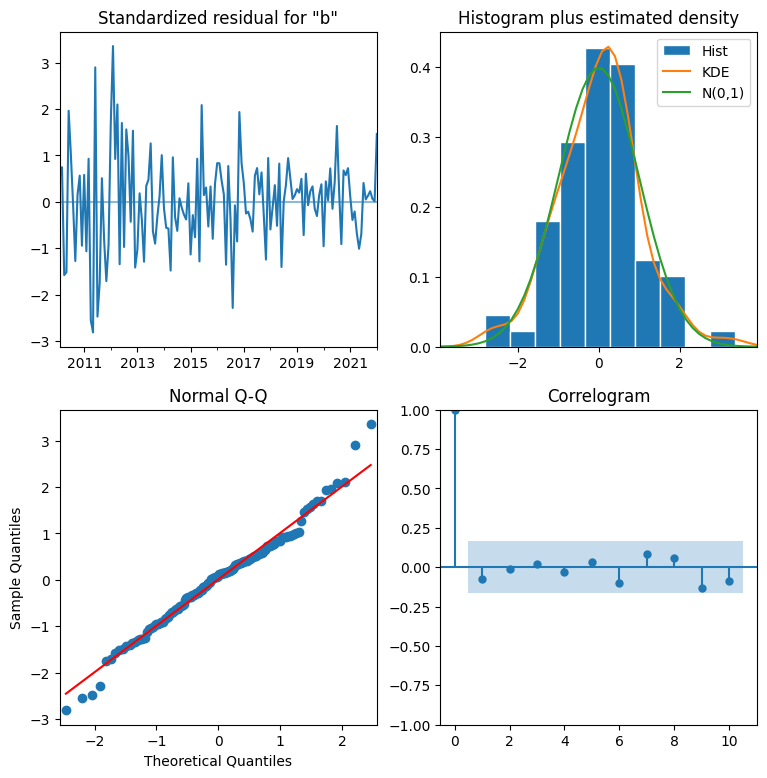

In [25]:
# fit box-cox model and check diagnostics

nightlife_box_cox_arima = fit_arima_model(sentiment_nightlife_per_month['box_cox'])
nightlife_box_cox_arima.plot_diagnostics(figsize=(9, 9))

ARIMA(0,1,0) - AIC:-125.43458462085744
ARIMA(0,1,1) - AIC:-189.79932703059185
ARIMA(0,1,2) - AIC:-189.3059718571884
ARIMA(0,1,3) - AIC:-189.13592711588547
ARIMA(0,1,4) - AIC:-187.27905179586205
ARIMA(0,2,0) - AIC:29.918596700353042
ARIMA(0,2,1) - AIC:-116.59303139531204
ARIMA(0,2,2) - AIC:-176.8854639276933
ARIMA(0,2,3) - AIC:-175.7486118685483
ARIMA(0,2,4) - AIC:-176.02072759877524
ARIMA(1,1,0) - AIC:-158.92076317173576
ARIMA(1,1,1) - AIC:-189.74016906362436
ARIMA(1,1,2) - AIC:-189.28524713090553
ARIMA(1,1,3) - AIC:-187.22106801843586
ARIMA(1,1,4) - AIC:-185.2833243214415
ARIMA(1,2,0) - AIC:-53.61315881411756
ARIMA(1,2,1) - AIC:-149.06854112892927
ARIMA(1,2,2) - AIC:-176.1823304215902
ARIMA(1,2,3) - AIC:-173.3022591557692
ARIMA(1,2,4) - AIC:-174.50565746751573
ARIMA(2,1,0) - AIC:-164.99778917796556
ARIMA(2,1,1) - AIC:-188.81133612968384
ARIMA(2,1,2) - AIC:-186.91401149026123
ARIMA(2,1,3) - AIC:-186.29042805944903
ARIMA(2,1,4) - AIC:-187.7087628689595
ARIMA(2,2,0) - AIC:-81.10506398544

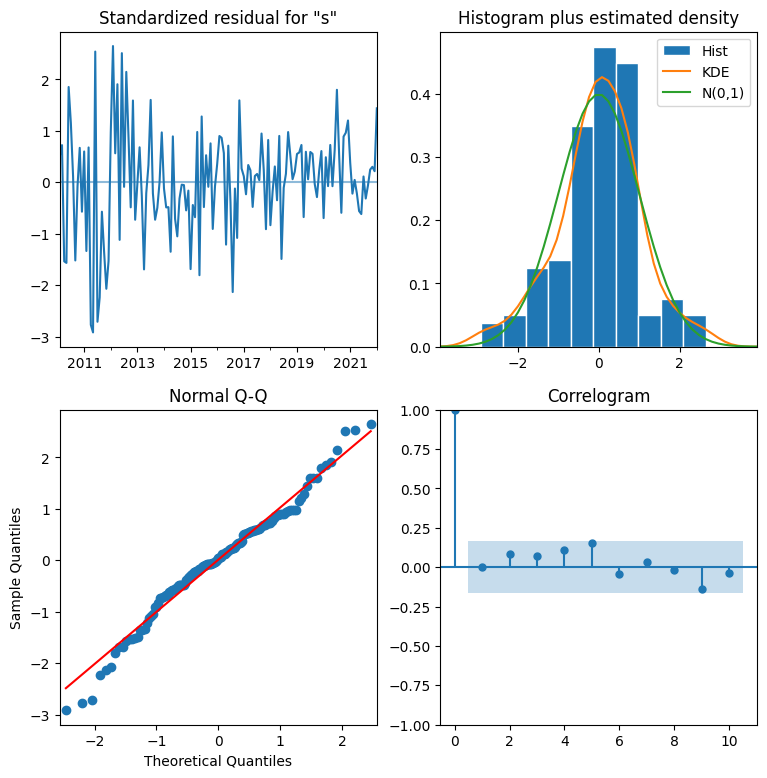

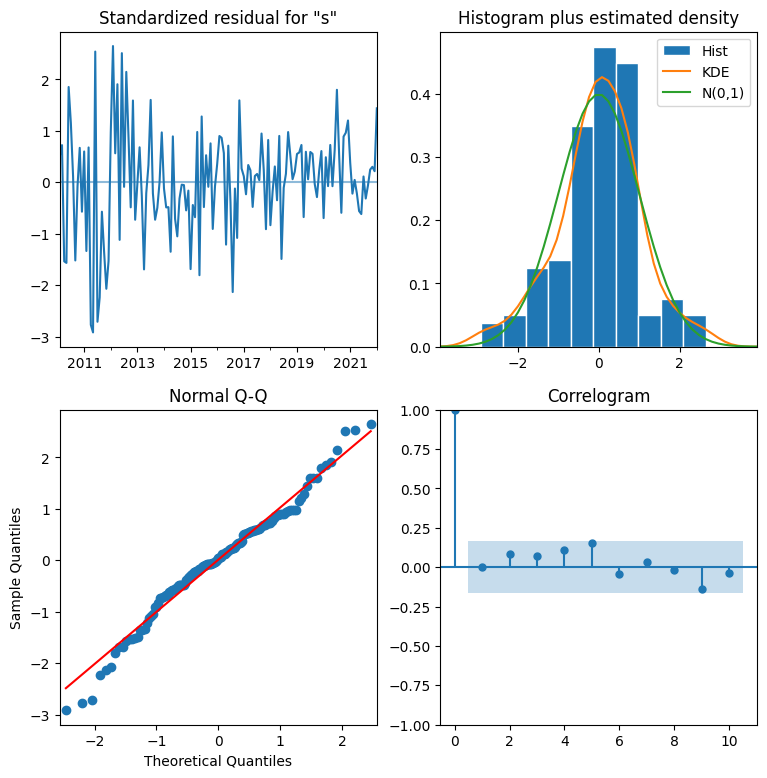

In [26]:
# fit model and check diagnostics

nightlife_arima = fit_arima_model(sentiment_nightlife_per_month['sentiment'])
nightlife_arima.plot_diagnostics(figsize=(9, 9))

In [27]:
# save models

joblib.dump(nightlife_box_cox_arima, 'models/nightlife_box_cox_arima.pkl')
joblib.dump(nightlife_arima, 'models/nightlife_arima.pkl')

['models/nightlife_arima.pkl']

#### Breakfast & brunch sentiment

ARIMA(0,1,0) - AIC:63.15719012834565
ARIMA(0,1,1) - AIC:-2.3299807537988286
ARIMA(0,1,2) - AIC:-1.577074388785178
ARIMA(0,1,3) - AIC:0.24201854556574887
ARIMA(0,1,4) - AIC:0.08782328650018556
ARIMA(0,2,0) - AIC:215.00641993718304
ARIMA(0,2,1) - AIC:70.69699566652947
ARIMA(0,2,2) - AIC:4.915446285164428
ARIMA(0,2,3) - AIC:4.461144206560618
ARIMA(0,2,4) - AIC:5.888007304170721
ARIMA(1,1,0) - AIC:33.07187417310609
ARIMA(1,1,1) - AIC:-1.629996419024721
ARIMA(1,1,2) - AIC:0.36960455241101187
ARIMA(1,1,3) - AIC:0.6032216622518867
ARIMA(1,1,4) - AIC:1.0479947745878846
ARIMA(1,2,0) - AIC:135.46581336814674
ARIMA(1,2,1) - AIC:41.558601642148716
ARIMA(1,2,2) - AIC:4.23636806005868
ARIMA(1,2,3) - AIC:7.931471787645904
ARIMA(1,2,4) - AIC:6.28748718231752
ARIMA(2,1,0) - AIC:27.222182587481456
ARIMA(2,1,1) - AIC:0.3687210671226282
ARIMA(2,1,2) - AIC:0.39373131285220353
ARIMA(2,1,3) - AIC:-0.5063267314107236
ARIMA(2,1,4) - AIC:1.4538824783930622
ARIMA(2,2,0) - AIC:113.48836250679295
ARIMA(2,2,1) - AI

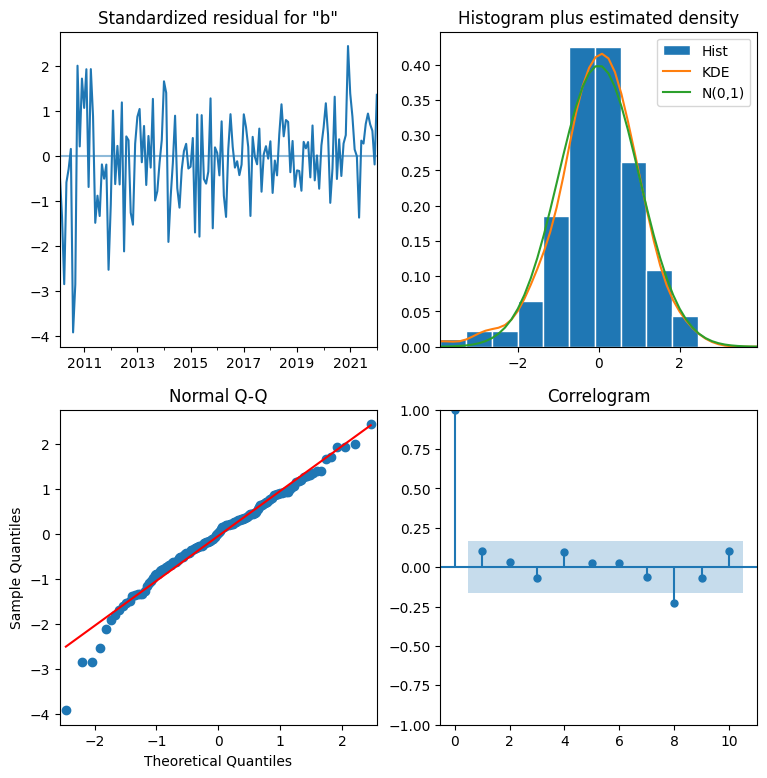

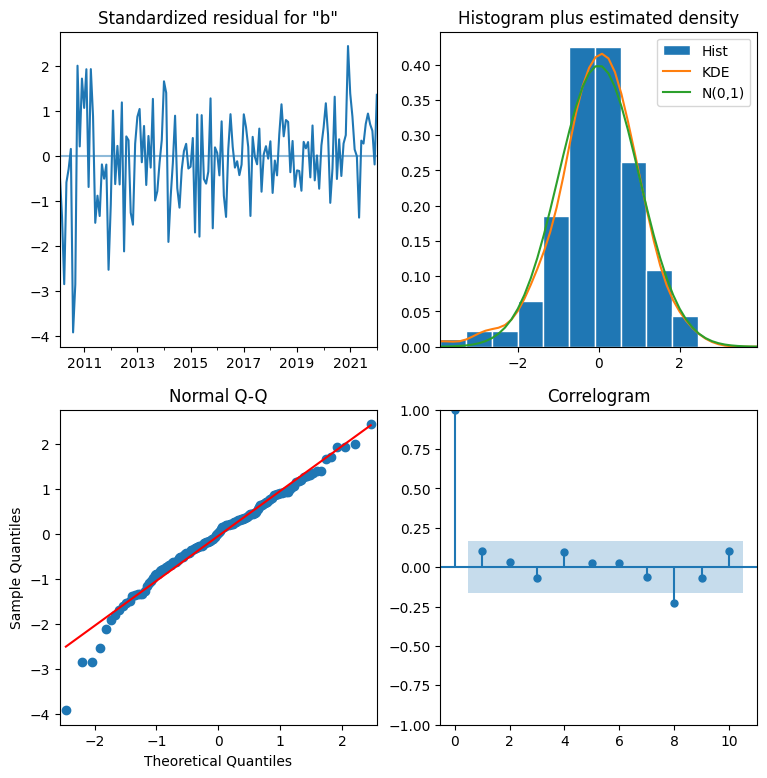

In [28]:
# fit box-cox model and check diagnostics

breakfast_brunch_box_cox_arima = fit_arima_model(sentiment_breakfast_brunch_per_month['box_cox'])
breakfast_brunch_box_cox_arima.plot_diagnostics(figsize=(9, 9))

ARIMA(0,1,0) - AIC:-66.19553494713348
ARIMA(0,1,1) - AIC:-132.36689159403005
ARIMA(0,1,2) - AIC:-131.60485846813458
ARIMA(0,1,3) - AIC:-129.7324777683786
ARIMA(0,1,4) - AIC:-129.9103302552219
ARIMA(0,2,0) - AIC:86.43031073007194
ARIMA(0,2,1) - AIC:-57.75354872622647
ARIMA(0,2,2) - AIC:-124.2826240537365
ARIMA(0,2,3) - AIC:-124.6502240287441
ARIMA(0,2,4) - AIC:-123.09751497414044
ARIMA(1,1,0) - AIC:-95.97572796099496
ARIMA(1,1,1) - AIC:-131.6416101104248
ARIMA(1,1,2) - AIC:-129.64191259615546
ARIMA(1,1,3) - AIC:-129.27353973771307
ARIMA(1,1,4) - AIC:-128.86507741994978
ARIMA(1,2,0) - AIC:7.726668137335395
ARIMA(1,2,1) - AIC:-86.59485916820148
ARIMA(1,2,2) - AIC:-124.82948589308285
ARIMA(1,2,3) - AIC:-121.26649810450976
ARIMA(1,2,4) - AIC:-122.70939062185528
ARIMA(2,1,0) - AIC:-102.13659882456821
ARIMA(2,1,1) - AIC:-129.642597917452
ARIMA(2,1,2) - AIC:-129.4631986997543
ARIMA(2,1,3) - AIC:-130.235662513472
ARIMA(2,1,4) - AIC:-128.2622666267734
ARIMA(2,2,0) - AIC:-14.449123545236912
ARIMA

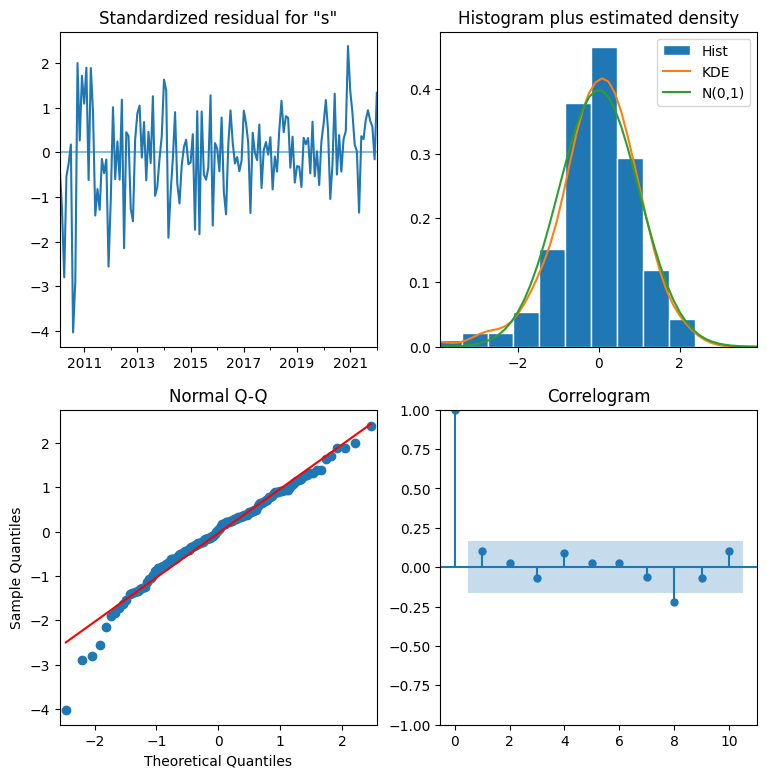

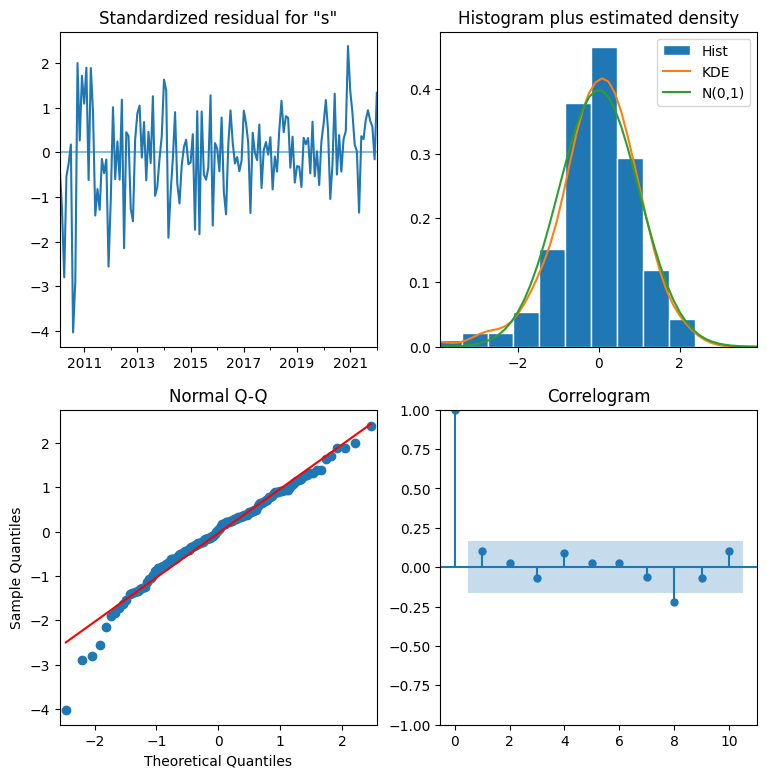

In [29]:
# fit model and check diagnostics

breakfast_brunch_arima = fit_arima_model(sentiment_breakfast_brunch_per_month['sentiment'])
breakfast_brunch_arima.plot_diagnostics(figsize=(9, 9))

In [30]:
# save models

joblib.dump(breakfast_brunch_box_cox_arima, 'models/breakfast_brunch_box_cox_arima.pkl')
joblib.dump(breakfast_brunch_arima, 'models/breakfast_brunch_arima.pkl')

['models/breakfast_brunch_arima.pkl']

### ARIMA-X modelling

In [31]:
def covid_event(date):
    '''
    Check if date is within COVID-19 event period
    '''
    start_date = pd.to_datetime('2020-01-31')
    end_date = pd.to_datetime('2020-07-31')
    return start_date <= date <= end_date

In [32]:
# create exogenous variables (COVID)

negative_exog_variables = pd.DataFrame(index=negative_reviews_per_month['box_cox'].index)
neutral_exog_variables = pd.DataFrame(index=neutral_reviews_per_month['box_cox'].index)
positive_exog_variables = pd.DataFrame(index=positive_reviews_per_month['box_cox'].index)

negative_exog_variables['covid'] = 0
neutral_exog_variables['covid'] = 0
positive_exog_variables['covid'] = 0

for date in negative_exog_variables.index:
    if covid_event(date):
        negative_exog_variables.loc[date, 'covid'] = 1

for date in neutral_exog_variables.index:
    if covid_event(date):
        neutral_exog_variables.loc[date, 'covid'] = 1
        
for date in positive_exog_variables.index:
    if covid_event(date):
        positive_exog_variables.loc[date, 'covid'] = 1

In [33]:
# order values

p_values = range(0, 5)
d_values = range(1, 3)
q_values = range(0, 5)

In [34]:
def fit_arimax_model(time_series, exog_variables, p_values=p_values, d_values=d_values, q_values=q_values):
    '''
    Fit ARIMAX model to time series data using AICc
    '''
    best_aic = float("inf")
    best_order = None
    best_model = None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    model = ARIMA(time_series, order=(p, d, q), exog=exog_variables)
                    model_fit = model.fit()
                    aic = model_fit.aic
                    print(f'ARIMAX({p},{d},{q}) - AIC:{aic}')
                    if aic < best_aic:
                        best_aic = aic
                        best_order = (p, d, q)
                        best_model = model_fit
                except Exception as e:
                    print(f'Error fitting ARIMAX({p},{d},{q}): {e}')
                    continue
    print(f'Best ARIMAX model order: {best_order} with AIC: {best_aic}')
    return best_model

#### Negative reviews

ARIMAX(0,1,0) - AIC:45.241561299118
ARIMAX(0,1,1) - AIC:26.125569252507347
ARIMAX(0,1,2) - AIC:28.09003598603771
ARIMAX(0,1,3) - AIC:27.555427276304613
ARIMAX(0,1,4) - AIC:27.723841867159024
ARIMAX(0,2,0) - AIC:183.08583416821256
ARIMAX(0,2,1) - AIC:52.69220392362693
ARIMAX(0,2,2) - AIC:33.36036982955272
ARIMAX(0,2,3) - AIC:35.351478553829466
ARIMAX(0,2,4) - AIC:29.619393612120383
ARIMAX(1,1,0) - AIC:26.34435284998157
ARIMAX(1,1,1) - AIC:27.996472344911023
ARIMAX(1,1,2) - AIC:26.260289852281083
ARIMAX(1,1,3) - AIC:26.589465238882145
ARIMAX(1,1,4) - AIC:28.386090443723678
ARIMAX(1,2,0) - AIC:96.78140605214455
ARIMAX(1,2,1) - AIC:33.98426076585177
ARIMAX(1,2,2) - AIC:31.01700848883889
ARIMAX(1,2,3) - AIC:33.582288702599634
ARIMAX(1,2,4) - AIC:29.55161078535578
ARIMAX(2,1,0) - AIC:28.27929892146834
ARIMAX(2,1,1) - AIC:27.520538679255665
ARIMAX(2,1,2) - AIC:26.4897121865311
ARIMAX(2,1,3) - AIC:23.791818132295827
ARIMAX(2,1,4) - AIC:25.331908640687196
ARIMAX(2,2,0) - AIC:83.27301444382786
A

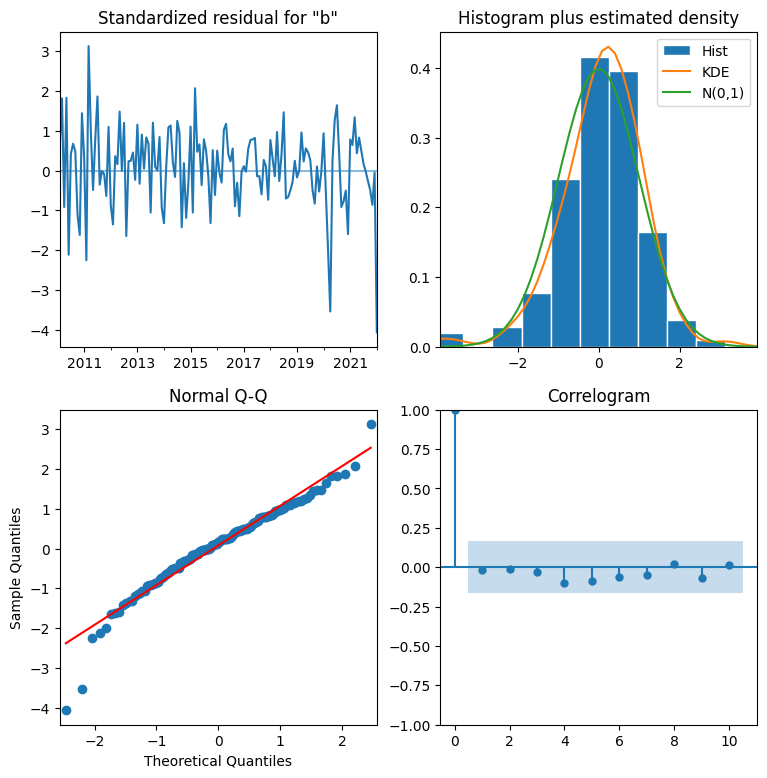

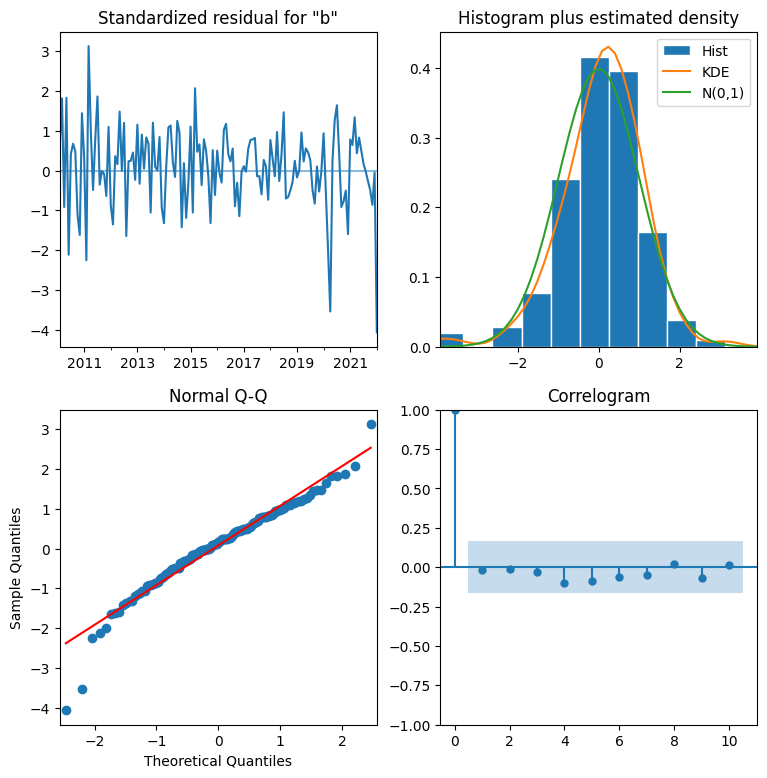

In [35]:
# fit box-cox model and check diagnostics

negative_box_cox_arimax = fit_arimax_model(negative_reviews_per_month['box_cox'], negative_exog_variables)
negative_box_cox_arimax.plot_diagnostics(figsize=(9, 9))

ARIMAX(0,1,0) - AIC:1304.9412336364246
ARIMAX(0,1,1) - AIC:1305.9061683636007
ARIMAX(0,1,2) - AIC:1306.1477149590442
ARIMAX(0,1,3) - AIC:1304.3789469283886
ARIMAX(0,1,4) - AIC:1306.049275152116
ARIMAX(0,2,0) - AIC:1400.6401722713658
ARIMAX(0,2,1) - AIC:1303.8526916486678
ARIMAX(0,2,2) - AIC:1304.9728129397342
ARIMAX(0,2,3) - AIC:1304.9065776762802
ARIMAX(0,2,4) - AIC:1303.7849227296292
ARIMAX(1,1,0) - AIC:1305.6862913398681
ARIMAX(1,1,1) - AIC:1305.6503671616697
ARIMAX(1,1,2) - AIC:1306.7049615996136
ARIMAX(1,1,3) - AIC:1304.235534490258
ARIMAX(1,1,4) - AIC:1306.0907904360201
ARIMAX(1,2,0) - AIC:1340.9980022779896
ARIMAX(1,2,1) - AIC:1304.7701496620118
ARIMAX(1,2,2) - AIC:1304.6986400082117
ARIMAX(1,2,3) - AIC:1305.5512266460478
ARIMAX(1,2,4) - AIC:1302.5823784963334
ARIMAX(2,1,0) - AIC:1305.8558715480444
ARIMAX(2,1,1) - AIC:1307.014948105593
ARIMAX(2,1,2) - AIC:1307.4894419671184
ARIMAX(2,1,3) - AIC:1305.8989565429113
ARIMAX(2,1,4) - AIC:1307.896232668292
ARIMAX(2,2,0) - AIC:1336.9087

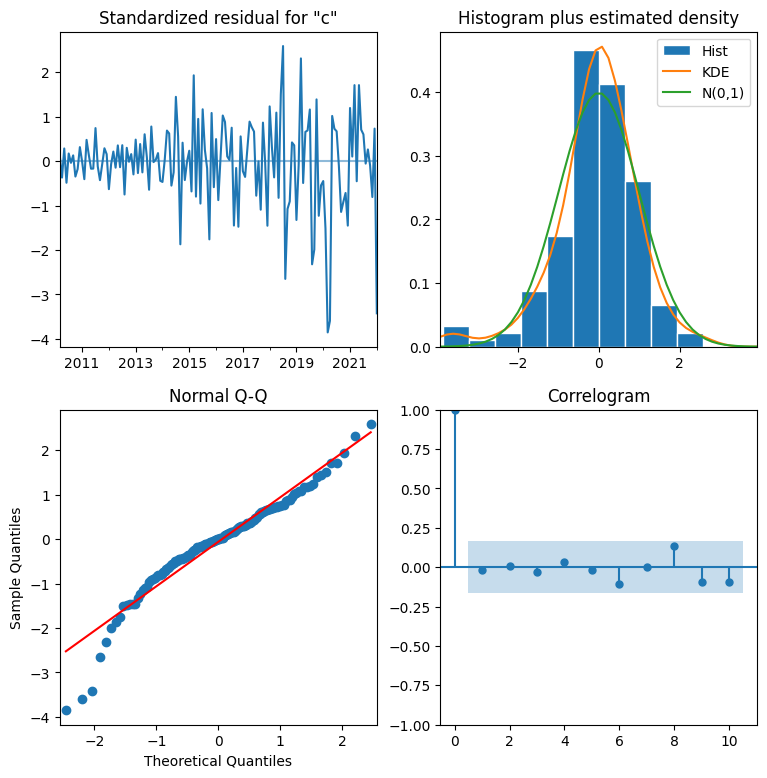

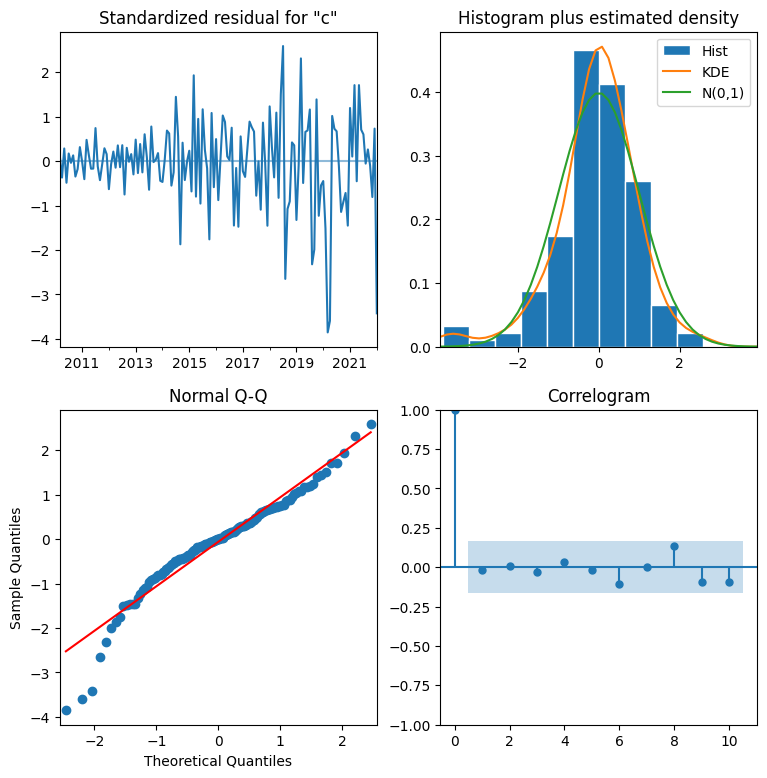

In [36]:
# fit model and check diagnostics

negative_arimax = fit_arimax_model(negative_reviews_per_month['count'], negative_exog_variables)
negative_arimax.plot_diagnostics(figsize=(9, 9))

In [37]:
# save models

joblib.dump(negative_box_cox_arimax, 'models/negative_box_cox_arimax.pkl')
joblib.dump(negative_arimax, 'models/negative_arimax.pkl')

['models/negative_arimax.pkl']

#### Neutral reviews

ARIMAX(0,1,0) - AIC:61.6984499351522
ARIMAX(0,1,1) - AIC:48.54518071783268
ARIMAX(0,1,2) - AIC:48.93864725255767
ARIMAX(0,1,3) - AIC:50.93259157542833
ARIMAX(0,1,4) - AIC:50.05922232207786
ARIMAX(0,2,0) - AIC:191.4418738860238
ARIMAX(0,2,1) - AIC:69.19214121650252
ARIMAX(0,2,2) - AIC:56.8380907461472
ARIMAX(0,2,3) - AIC:57.40140999536132
ARIMAX(0,2,4) - AIC:59.382117187800844
ARIMAX(1,1,0) - AIC:52.922526168320445
ARIMAX(1,1,1) - AIC:48.50292369274034
ARIMAX(1,1,2) - AIC:48.68102877034741
ARIMAX(1,1,3) - AIC:50.497220344274595
ARIMAX(1,1,4) - AIC:50.72284723814005
ARIMAX(1,2,0) - AIC:138.5341023774477
ARIMAX(1,2,1) - AIC:60.871305594747525
ARIMAX(1,2,2) - AIC:56.82584715367177
ARIMAX(1,2,3) - AIC:57.00051196172505
ARIMAX(1,2,4) - AIC:58.89436371357685
ARIMAX(2,1,0) - AIC:49.15744187919266
ARIMAX(2,1,1) - AIC:51.14730263550481
ARIMAX(2,1,2) - AIC:50.247074845655675
ARIMAX(2,1,3) - AIC:50.08878685650546
ARIMAX(2,1,4) - AIC:51.707803366936155
ARIMAX(2,2,0) - AIC:99.41429624746375
ARIMAX(2

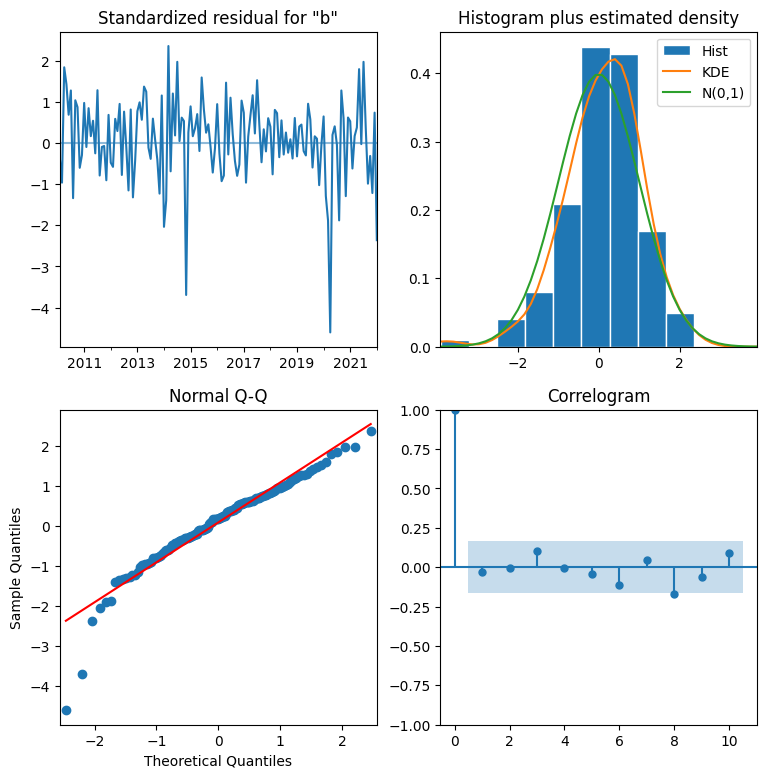

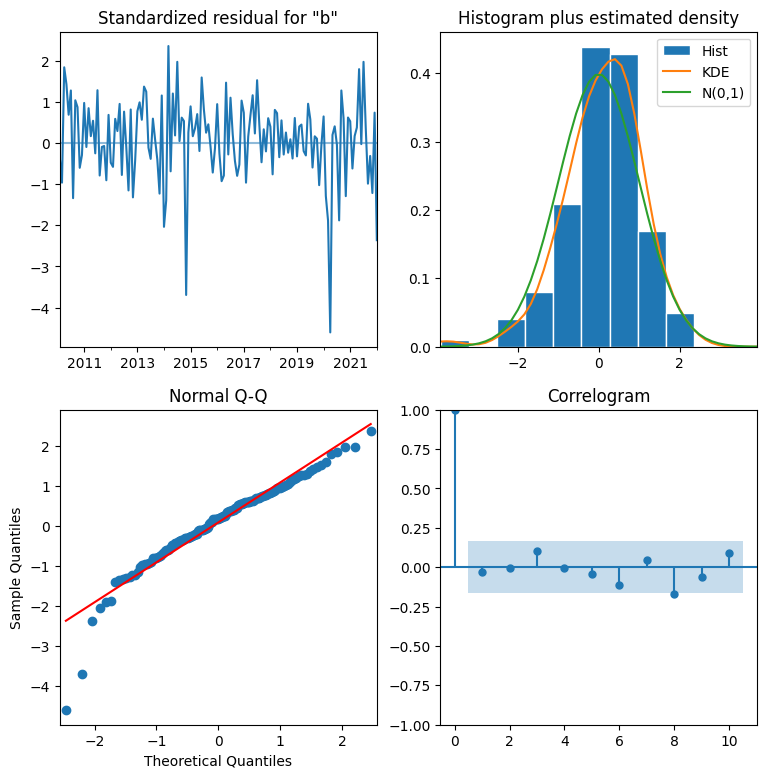

In [38]:
# fit box-cox model and check diagnostics

neutral_box_cox_arimax = fit_arimax_model(neutral_reviews_per_month['box_cox'], neutral_exog_variables)
neutral_box_cox_arimax.plot_diagnostics(figsize=(9, 9))

ARIMAX(0,1,0) - AIC:1103.0992990290515
ARIMAX(0,1,1) - AIC:1093.6966158804712
ARIMAX(0,1,2) - AIC:1094.8799239582252
ARIMAX(0,1,3) - AIC:1095.8745978713841
ARIMAX(0,1,4) - AIC:1096.6956146930406
ARIMAX(0,2,0) - AIC:1221.7291369748714
ARIMAX(0,2,1) - AIC:1103.4187342650205
ARIMAX(0,2,2) - AIC:1094.8199862637905
ARIMAX(0,2,3) - AIC:1096.1745195809278
ARIMAX(0,2,4) - AIC:1096.9217624176033
ARIMAX(1,1,0) - AIC:1096.6355541383255
ARIMAX(1,1,1) - AIC:1095.1871330028378
ARIMAX(1,1,2) - AIC:1093.7534926066228
ARIMAX(1,1,3) - AIC:1095.7318434741237
ARIMAX(1,1,4) - AIC:1097.1003035642002
ARIMAX(1,2,0) - AIC:1170.8394081109159
ARIMAX(1,2,1) - AIC:1097.4214901642715
ARIMAX(1,2,2) - AIC:1096.447868855324
ARIMAX(1,2,3) - AIC:1094.9214845260904
ARIMAX(1,2,4) - AIC:1097.5337391963917
ARIMAX(2,1,0) - AIC:1093.4991267539685
ARIMAX(2,1,1) - AIC:1095.363882683605
ARIMAX(2,1,2) - AIC:1091.8941143418888
ARIMAX(2,1,3) - AIC:1096.951100627046
ARIMAX(2,1,4) - AIC:1098.0274372034442
ARIMAX(2,2,0) - AIC:1134.313

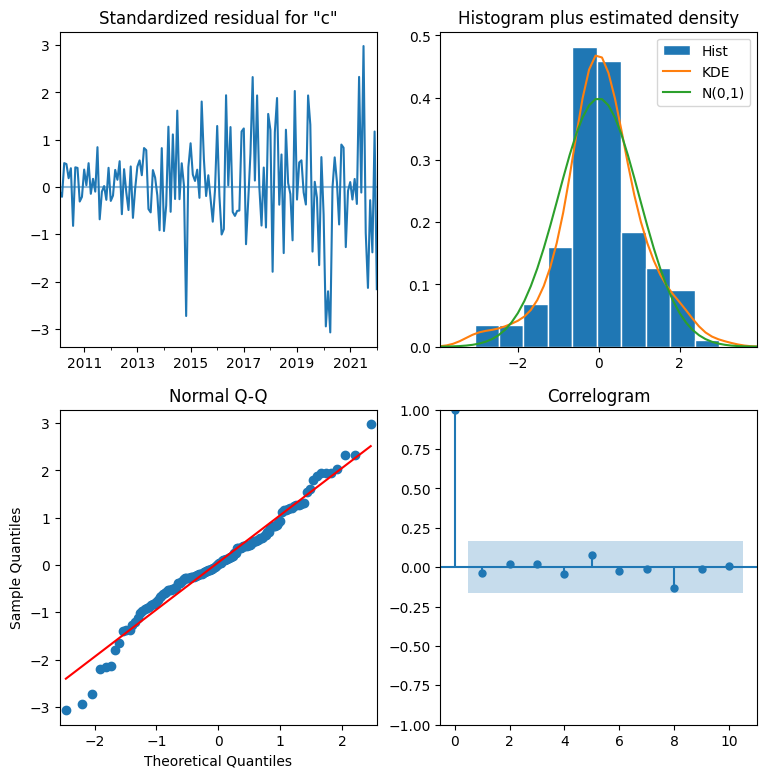

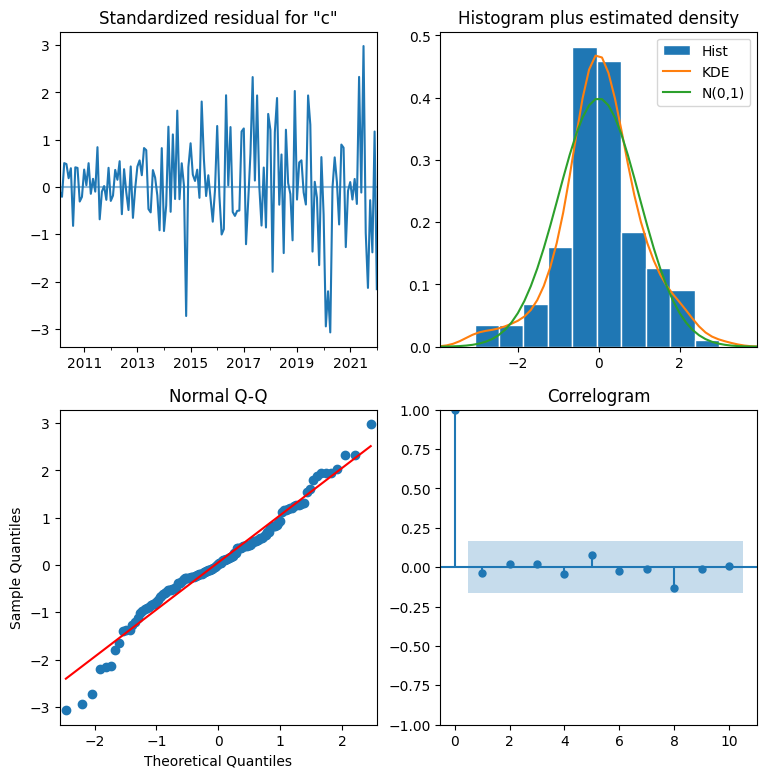

In [39]:
# fit model and check diagnostics

neutral_arimax = fit_arimax_model(neutral_reviews_per_month['count'], neutral_exog_variables)
neutral_arimax.plot_diagnostics(figsize=(9, 9))

In [40]:
# save models

joblib.dump(neutral_box_cox_arimax, 'models/neutral_box_cox_arimax.pkl')
joblib.dump(neutral_arimax, 'models/neutral_arimax.pkl')

['models/neutral_arimax.pkl']

#### Positive reviews

ARIMAX(0,1,0) - AIC:-33.42971911503073
ARIMAX(0,1,1) - AIC:-38.566559934908256
ARIMAX(0,1,2) - AIC:-41.94665014124771
ARIMAX(0,1,3) - AIC:-42.35266062362506
ARIMAX(0,1,4) - AIC:-41.79585136280242
ARIMAX(0,2,0) - AIC:88.21878908291488
ARIMAX(0,2,1) - AIC:-25.568290129120648
ARIMAX(0,2,2) - AIC:-30.570633143901148
ARIMAX(0,2,3) - AIC:-35.04570990648384
ARIMAX(0,2,4) - AIC:-37.42745871154775
ARIMAX(1,1,0) - AIC:-36.202963788887075
ARIMAX(1,1,1) - AIC:-42.61909873377293
ARIMAX(1,1,2) - AIC:-41.008648922317484
ARIMAX(1,1,3) - AIC:-37.99114774115244
ARIMAX(1,1,4) - AIC:-38.35268341412055
ARIMAX(1,2,0) - AIC:41.99095343552562
ARIMAX(1,2,1) - AIC:-28.20948148582262
ARIMAX(1,2,2) - AIC:-37.509341183328104
ARIMAX(1,2,3) - AIC:-35.65372962550017
ARIMAX(1,2,4) - AIC:-31.0501644499669
ARIMAX(2,1,0) - AIC:-37.01645455407179
ARIMAX(2,1,1) - AIC:-41.22813256996824
ARIMAX(2,1,2) - AIC:-39.70062448316573
ARIMAX(2,1,3) - AIC:-41.651933353758345
ARIMAX(2,1,4) - AIC:-40.39848521283368
ARIMAX(2,2,0) - AIC:2

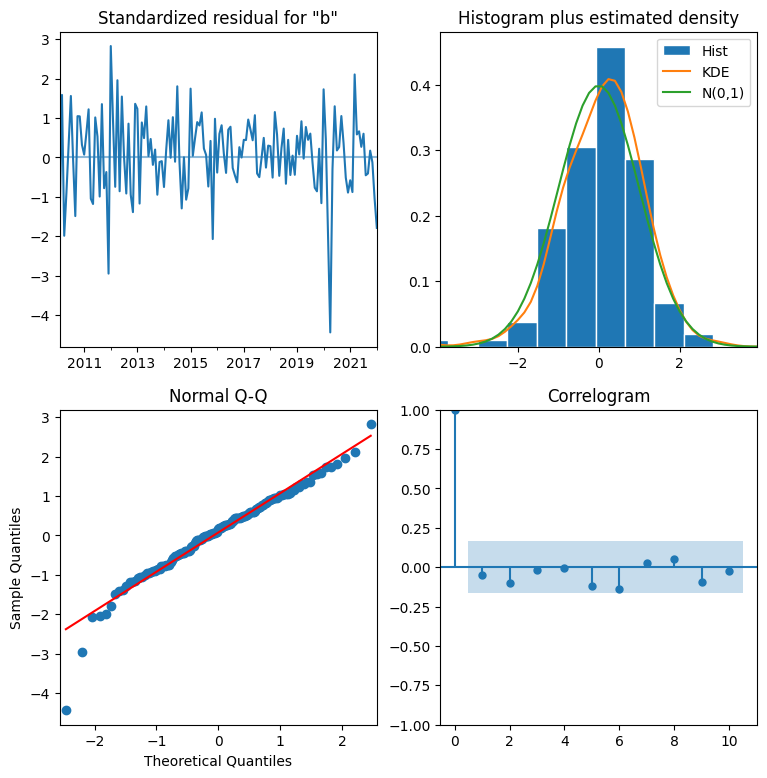

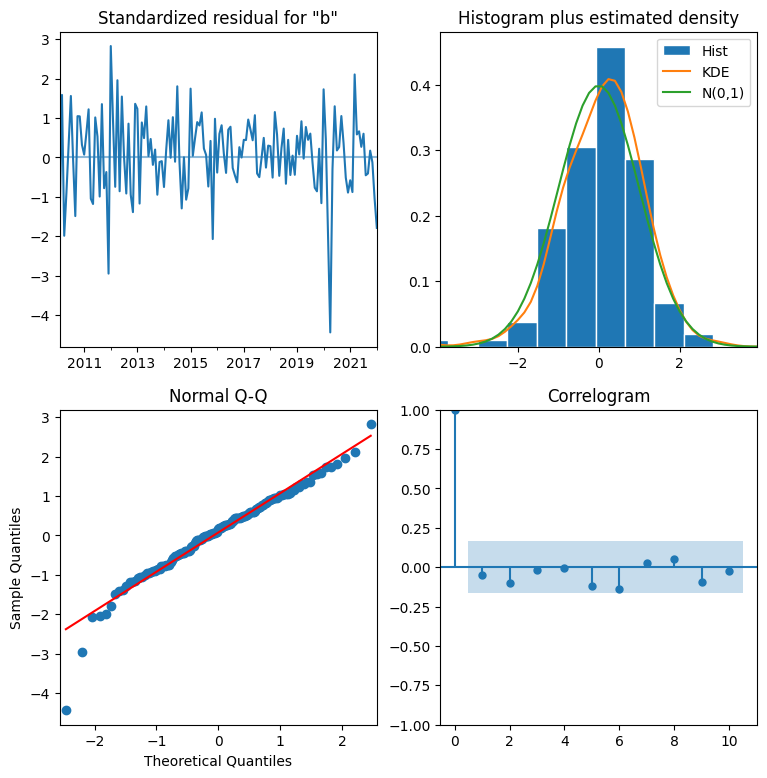

In [41]:
# fit box-cox model and check diagnostics

positive_box_cox_arimax = fit_arimax_model(positive_reviews_per_month['box_cox'], positive_exog_variables)
positive_box_cox_arimax.plot_diagnostics(figsize=(9, 9))

ARIMAX(0,1,0) - AIC:1576.2683812271905
ARIMAX(0,1,1) - AIC:1577.5864741292978
ARIMAX(0,1,2) - AIC:1579.5824183105929
ARIMAX(0,1,3) - AIC:1577.3752163108174
ARIMAX(0,1,4) - AIC:1578.9834802960384
ARIMAX(0,2,0) - AIC:1672.0809941541156
ARIMAX(0,2,1) - AIC:1573.1888469812925
ARIMAX(0,2,2) - AIC:1574.6090008577985
ARIMAX(0,2,3) - AIC:1576.609121144695
ARIMAX(0,2,4) - AIC:1574.6993468746186
ARIMAX(1,1,0) - AIC:1577.5814841058973
ARIMAX(1,1,1) - AIC:1579.0957054647106
ARIMAX(1,1,2) - AIC:1579.8670016119913
ARIMAX(1,1,3) - AIC:1579.02299941597
ARIMAX(1,1,4) - AIC:1581.3771091342965
ARIMAX(1,2,0) - AIC:1622.8093128736457
ARIMAX(1,2,1) - AIC:1574.6013149044088
ARIMAX(1,2,2) - AIC:1576.0880329250317
ARIMAX(1,2,3) - AIC:1577.9495273676744
ARIMAX(1,2,4) - AIC:1576.3233975374883
ARIMAX(2,1,0) - AIC:1579.5604704858915
ARIMAX(2,1,1) - AIC:1581.0540963508786
ARIMAX(2,1,2) - AIC:1581.4076665060725
ARIMAX(2,1,3) - AIC:1565.6233091927324
ARIMAX(2,1,4) - AIC:1565.0168529339123
ARIMAX(2,2,0) - AIC:1615.455

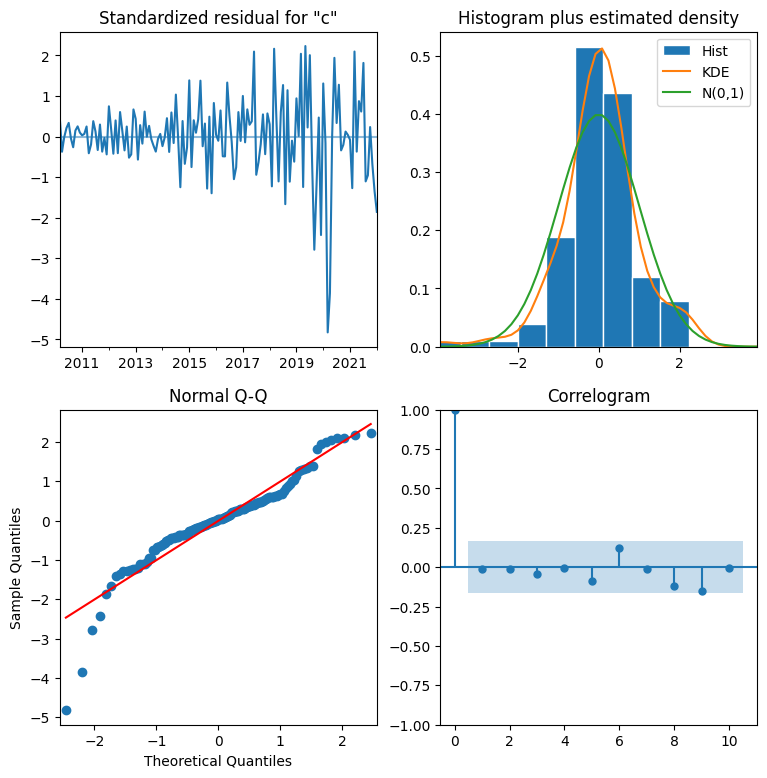

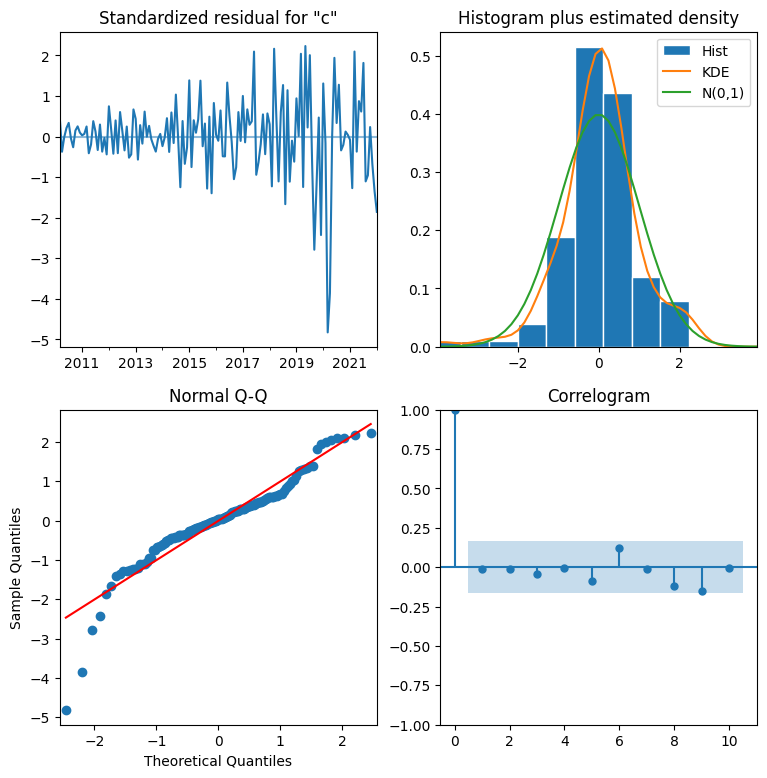

In [42]:
# fit model and check diagnostics

positive_arimax = fit_arimax_model(positive_reviews_per_month['count'], positive_exog_variables)
positive_arimax.plot_diagnostics(figsize=(9, 9))

In [43]:
# save models

joblib.dump(positive_box_cox_arimax, 'models/positive_box_cox_arimax.pkl')
joblib.dump(positive_arimax, 'models/positive_arimax.pkl')

['models/positive_arimax.pkl']